# import libraries

In [358]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# check library versions
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
# print('matplotlib version:', plt.__version__)

numpy version: 1.21.5
pandas version: 1.4.2


# load csv file and check dataframe

In [359]:
# create dataframe and check if it works
csv_path_accidents = "../data/01-01-2012_31-12-2021/Ongevallengegevens/ongevallen.csv" # 2012 to 2021
# csv_path = "../data/01-01-2021_31-12-2021/Ongevallengegevens/ongevallen.csv" # 2021 only
df_accidents = pd.read_csv(csv_path_accidents, sep=',')
df_accidents.columns =["VKL_NUMMER","REGNUMMER","PVOPGEM","DATUM_VKL","DAG_CODE","MND_NUMMER","JAAR_VKL","TIJDSTIP","UUR","DDL_ID","AP3_CODE","AP4_CODE","AP5_CODE","ANTL_SLA","ANTL_DOD","ANTL_GZH","ANTL_SEH","ANTL_GOV","ANTL_PTJ","ANTL_TDT","MNE_CODE","AOL_ID","NIVEAUKOP","WSE_ID","WSE_AN","BEBKOM","MAXSNELHD","WVL_ID","WVG_ID","WVG_AN","WDK_ID","WDK_AN","LGD_ID","ZAD_ID","WGD_CODE_1","WGD_CODE_2","BZD_ID_VM1","BZD_ID_VM2","BZD_ID_VM3","BZD_VM_AN","BZD_ID_IF1","BZD_ID_IF2","BZD_ID_IF3","BZD_IF_AN","BZD_ID_TA1","BZD_ID_TA2","BZD_ID_TA3","BZD_TA_AN","JTE_ID","WVK_ID","HECTOMETER","FK_VELD5","HUISNUMMER","GME_ID","GME_NAAM","PVE_CODE","PVE_NAAM","KDD_NAAM","PLT_NAAM","DIENSTCODE","DIENSTNAAM","DISTRCODE","DISTRNAAM","DAGTYPE","IND_ALC","WEEKNR"]
df_accidents.head(10)

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_16212\3264998529.py:4: DtypeWarning: Columns (1,2,24,25,29,31,34,35,39,43,47,52,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(csv_path_accidents, sep=',')


,VKL_NUMMER,REGNUMMER,PVOPGEM,DATUM_VKL,DAG_CODE,MND_NUMMER,JAAR_VKL,TIJDSTIP,UUR,DDL_ID,...,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,DAGTYPE,IND_ALC,WEEKNR
0,20140135691,2014121457.0,J,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord,NaN,NaN,NaN
4,20140135695,2014218979.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,J,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN


next to code blocks do the same but the second one is significantly faster

In [360]:
# # check how many fields are filled in per column
# for i, c in df_accidents.iteritems():
#     k = 0
#     for j in c:
#         if not pd.isna(j):
#             k+=1
#     print(i, ": ", k)

In [361]:
# check how many fields are filled in per column
for i, j in df_accidents.iteritems():
    k = j.count()
    print(i, ": ", k)

VKL_NUMMER :  1138956
REGNUMMER :  961419
PVOPGEM :  43716
DATUM_VKL :  0
DAG_CODE :  0
MND_NUMMER :  0
JAAR_VKL :  1138956
TIJDSTIP :  0
UUR :  0
DDL_ID :  0
AP3_CODE :  1138956
AP4_CODE :  0
AP5_CODE :  0
ANTL_SLA :  0
ANTL_DOD :  0
ANTL_GZH :  0
ANTL_SEH :  0
ANTL_GOV :  0
ANTL_PTJ :  1138956
ANTL_TDT :  0
MNE_CODE :  0
AOL_ID :  1138956
NIVEAUKOP :  1138956
WSE_ID :  640003
WSE_AN :  151
BEBKOM :  576826
MAXSNELHD :  758225
WVL_ID :  636695
WVG_ID :  628376
WVG_AN :  4088
WDK_ID :  633319
WDK_AN :  2692
LGD_ID :  729555
ZAD_ID :  8
WGD_CODE_1 :  611356
WGD_CODE_2 :  137
BZD_ID_VM1 :  59336
BZD_ID_VM2 :  1432
BZD_ID_VM3 :  82
BZD_VM_AN :  1062
BZD_ID_IF1 :  33147
BZD_ID_IF2 :  4
BZD_ID_IF3 :  0
BZD_IF_AN :  52843
BZD_ID_TA1 :  9377
BZD_ID_TA2 :  59
BZD_ID_TA3 :  0
BZD_TA_AN :  796
JTE_ID :  272869
WVK_ID :  866087
HECTOMETER :  264931
FK_VELD5 :  1138956
HUISNUMMER :  211577
GME_ID :  1138956
GME_NAAM :  1138956
PVE_CODE :  1138956
PVE_NAAM :  1138956
KDD_NAAM :  947314
PLT_NAAM :  

# drop unnecessary columns

In [362]:
# test dropping columns
df_test = df_accidents.drop(columns=["PVOPGEM", "DATUM_VKL"])
df_test.head(10)

,VKL_NUMMER,REGNUMMER,DAG_CODE,MND_NUMMER,JAAR_VKL,TIJDSTIP,UUR,DDL_ID,AP3_CODE,AP4_CODE,...,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,DAGTYPE,IND_ALC,WEEKNR
0,20140135691,2014121457.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord,NaN,NaN,NaN
4,20140135695,2014218979.0,NaN,NaN,2014,NaN,NaN,NaN,LET,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,NaN,NaN,2014,NaN,NaN,NaN,LET,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
# # drop columns with less than x non empty in cells
# threshold = 100000
# df_2 = df_accidents
# bad_rows = []
# for i, c in df_accidents.iteritems():
#     k = 0
#     for j in c:
#         if not pd.isna(j):
#             k+=1
#     if k <= threshold:
#         bad_rows.append(i)
# df_2 = df_2.drop(columns=bad_rows)
# df_2.head(10)

In [364]:
# drop columns with less than x non empty in cells
threshold = 100000
df_2 = df_accidents
bad_rows = []
for i, c in df_accidents.iteritems():
    k = c.count()
    if k <= threshold:
        bad_rows.append(i)
df_2 = df_2.drop(columns=bad_rows)
df_2.head(10)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_ID,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,1931,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,2014,UMS,2,0,E,1.0,NaN,100.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord
4,20140135695,2014218979.0,2014,LET,2,0,G,4.0,NaN,30.0,...,534,Hillegom,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,2014,LET,2,9,S,1.0,NaN,50.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,2014,UMS,1,9,E,NaN,NaN,NaN,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,2014,UMS,2,0,G,4.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN


In [365]:
# for i, j in df_2.iteritems():
#     l = 0
#     for k in j:
#         if not pd.isna(k):
#             l+=1
#     print(i, ": ", l)

In [366]:
for i, j in df_2.iteritems():
    k = j.count()
    print(i, ": ", k)

VKL_NUMMER :  1138956
REGNUMMER :  961419
JAAR_VKL :  1138956
AP3_CODE :  1138956
ANTL_PTJ :  1138956
AOL_ID :  1138956
NIVEAUKOP :  1138956
WSE_ID :  640003
BEBKOM :  576826
MAXSNELHD :  758225
WVL_ID :  636695
WVG_ID :  628376
WDK_ID :  633319
LGD_ID :  729555
WGD_CODE_1 :  611356
JTE_ID :  272869
WVK_ID :  866087
HECTOMETER :  264931
FK_VELD5 :  1138956
HUISNUMMER :  211577
GME_ID :  1138956
GME_NAAM :  1138956
PVE_CODE :  1138956
PVE_NAAM :  1138956
KDD_NAAM :  947314
PLT_NAAM :  1079326
DIENSTCODE :  180078
DIENSTNAAM :  180078
DISTRCODE :  180078
DISTRNAAM :  180078


# plot yearly, nationally and apply linear regression

range(2012, 2022)
[99353, 102160, 94593, 113289, 124992, 123930, 128225, 134617, 103578, 114219]


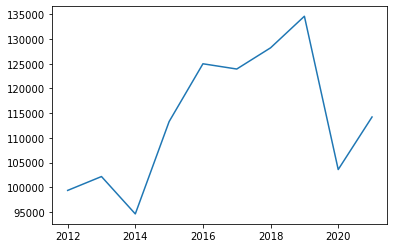

In [367]:
# plot yearly accidents

min_year = df_2.min(axis='rows', numeric_only=True)[1].astype(int)
max_year = df_2.max(axis='rows', numeric_only=True)[1].astype(int)
year = range(min_year, max_year + 1)
n_accidents = []
for i, j in enumerate(year):
    n = 0
    for k in df_2.iloc[:,2]:
        if j == k:
            n+=1
    n_accidents.insert(i, n)

print(year)
print(n_accidents)
fig, ax = plt.subplots()
ax.plot(year, n_accidents)
plt.show()

In [368]:
print(year)
print(n_accidents)
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)

range(2012, 2022)
[99353, 102160, 94593, 113289, 124992, 123930, 128225, 134617, 103578, 114219]


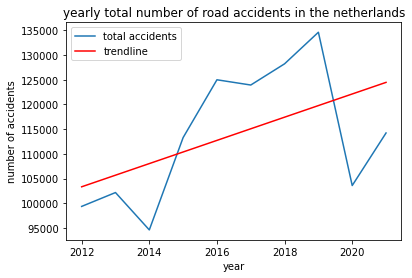

In [369]:
# show proper figure
plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents")
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

# plot yearly, per province and apply linear regression

In [370]:
print(df_2["PVE_NAAM"].unique())
print(df_2["PVE_CODE"].unique())

['Zuid-Holland' 'Noord-Brabant' 'Limburg' 'Gelderland' 'Flevoland'
 'Utrecht' 'Noord-Holland' 'Friesland' 'Groningen' 'Drenthe' 'Zeeland'
 'Overijssel']
['ZH' 'NB' 'LB' 'GL' 'FL' 'UT' 'NH' 'FR' 'GR' 'DR' 'ZL' 'OV']


In [371]:
df_4 = df_2
df_4["PVE_NUMR"] = df_4["PVE_CODE"].map( {"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12} ).astype(int)
df_4.head(3)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,PVE_NUMR
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1


In [372]:
df_5 = df_4[["JAAR_VKL", "PVE_CODE", "PVE_NUMR"]]
df_5.head(5)

,JAAR_VKL,PVE_CODE,PVE_NUMR
0,2014,ZH,1
1,2014,ZH,1
2,2014,ZH,1
3,2014,ZH,1
4,2014,ZH,1


In [373]:
# years_6 = df_5["JAAR_VKL"].unique()
# provinces_6 = df_5["PVE_CODE"].unique()
# provinces_number_6 = df_5["PVE_NUMR"].unique()

# # create an empty datafrqme for each year-province combination
# df_6 = pd.DataFrame(columns=["YEAR", "PROVINCE", "N_ACCIDENTS"])
# i = 0
# for j in years_6:
#     for k in provinces_6:
#         df_6.loc[i] = [j, k, 0]
#         i+=1

# # fill in the amount of accident for each combi
# for i, j in df_5.iterrows():
#     for k, l in df_6.iterrows():
#         if j[0] == l[0] and j[1] == l[1]:
#             df_6.iloc[k, 2] = df_6.iloc[k, 2] +1
#             break

# # save the dataframe to a csv
# df_6.to_csv("df_6.csv", index=False)

# df_6

In [374]:
df_7 = pd.read_csv("df_6.csv", sep=',')
df_7["PVE_CODE"] = df_7["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
0,2014,ZH,18208,1
1,2014,NB,15082,2
2,2014,LB,6436,3
3,2014,GL,12273,4
4,2014,FL,1595,5
...,...,...,...,...
115,2018,FR,3417,8
116,2018,GR,3566,9
117,2018,DR,2854,10
118,2018,ZL,2432,11


In [375]:
# # code used from internet
# import matplotlib.pyplot as plt
# import numpy as np

# NUM_COLORS = 12

# cm = plt.get_cmap('gist_rainbow')
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# for i in range(NUM_COLORS):
#     ax.plot(np.arange(10)*(i+1))

# fig.savefig('moreColors.png')
# plt.show()

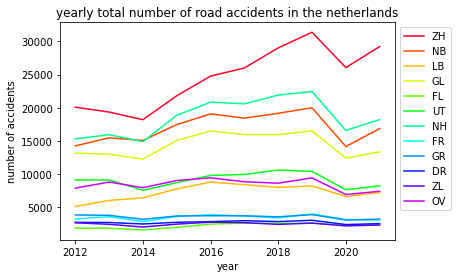

In [376]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)
# color_base = 1/n_provinces

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]
        line.append(point["N_ACCIDENTS"])
    line = np.array(line)
    # color = color_base * i
    plt.plot(year_2, line, label=j, color = colors[i]) #, color=(1-color, color, 0), alpha=0.6)

plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

combineren met inwoners per provincie in plot over 10 jaar

In [377]:
target_province = "DR"
sub_df_7 = df_7[df_7["PROVINCE"]==target_province]
sub_df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
9,2014,DR,2488,10
21,2020,DR,2403,10
33,2019,DR,3047,10
45,2021,DR,2539,10
57,2013,DR,2713,10
69,2012,DR,2735,10
81,2015,DR,2746,10
93,2016,DR,2843,10
105,2017,DR,2980,10
117,2018,DR,2854,10


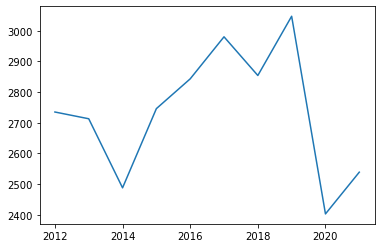

In [378]:
min_year = df_7["YEAR"].min()
max_year = df_7["YEAR"].max()
year = range(min_year, max_year + 1)
n_accidents = []
for i, j in enumerate(year):
    row = sub_df_7.loc[df_7["YEAR"]==j]
    n_accidents.insert(i, row["N_ACCIDENTS"])
fig, ax = plt.subplots()
ax.plot(year, n_accidents)
plt.show()

In [379]:
target_province = "GR"
df_7_2 = df_5.loc[df_5["PVE_CODE"] == target_province]
df_9 = df_7_2["JAAR_VKL"].value_counts()
df_10 = df_9.reset_index()
df_11 = df_10.sort_values("index", ignore_index=True)
print(df_7_2)
print(df_9)
print(df_10)
print(df_11)

         JAAR_VKL PVE_CODE  PVE_NUMR
272          2014       GR         9
274          2014       GR         9
276          2014       GR         9
279          2014       GR         9
281          2014       GR         9
...           ...      ...       ...
1138950      2021       GR         9
1138951      2021       GR         9
1138952      2021       GR         9
1138953      2021       GR         9
1138954      2021       GR         9

[35777 rows x 3 columns]
2019    3902
2012    3855
2013    3796
2016    3732
2017    3725
2015    3697
2018    3566
2021    3222
2014    3195
2020    3087
Name: JAAR_VKL, dtype: int64
   index  JAAR_VKL
0   2019      3902
1   2012      3855
2   2013      3796
3   2016      3732
4   2017      3725
5   2015      3697
6   2018      3566
7   2021      3222
8   2014      3195
9   2020      3087
   index  JAAR_VKL
0   2012      3855
1   2013      3796
2   2014      3195
3   2015      3697
4   2016      3732
5   2017      3725
6   2018      3566
7   2019  

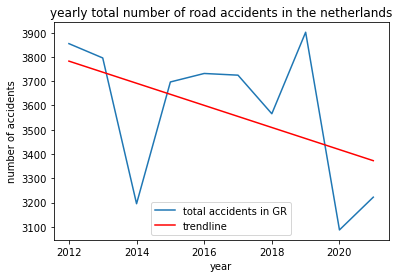

In [380]:
year = df_11.iloc[:,0]
n_accidents = df_11.iloc[:,1]
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)
plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents in " + target_province)
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

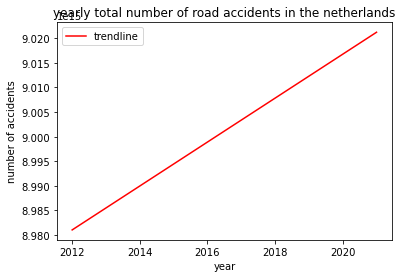

In [381]:
year = df_11.iloc[:,0]
n_accidents = df_11.iloc[:,1]
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
SGD_regression = SGDRegressor()
SGD_regression.fit(year_2, n_accidents_2)
Y_pred = SGD_regression.predict(year_2)
plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

# plt.plot(year, n_accidents, label="total accidents in " + target_province)
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

# find correlation

not enough data to find <br>
finding correlations to increas complexity

oorzaken meer ongelukken: <br>
meer inwoners: https://opendata.cbs.nl/statline/#/CBS/nl/dataset/70072NED/table?ts=1669975216124&fromstatweb=true <br>
meer verkeer <br>
weersomstandigheden <br>
wegkwaliteit <br>
zichtbaarheid <br>
verwarrende kruispunten <br>
snelheden (limiet en snelhijd bij het ongeluk)<br>
bebouwde kom <br>
mens/auto aanrijding correlatie bebouwde kom

data verzameld <br>
nu plots maken voor interessante verbanden

TODO: <br>
verband aantal ongelukken binnen buiten bebouwde kom en ongelukken met fietsen <br>
verband totale weglengte en totaal aantal ongelukken per provincie <br>
gradient voor kleur lijnen toevoegen
kijken naar verschillende soorten regressie

review:<br>
gradient voor kleur lijnen toevoegen


load datasets and make them usable

# import dataset about population

In [382]:
csv_path_population = "../data/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Bevolking_2.csv"
df_population = pd.read_csv(csv_path_population, sep=";")
new_column_names = []
for i in enumerate(df_population):
    new_column_name = i[1] + " (" + df_population.iloc[0, i[0]] + ")"
    new_column_names.append(new_column_name)
df_population.columns = new_column_names
df_population = df_population.drop([0]).reset_index().drop("index", axis="columns")
df_population.to_csv("population.csv", index=False)

In [383]:
df_population_2 = pd.read_csv("population.csv")

save and load to fix data types, numers are not counted as strings anymore <br>
added first row to the column name in brackets: ()

In [384]:
used_df = df_population
test_1 = used_df.iloc[3,3]
test_2 = used_df.iloc[3,2]
test_3 = test_1 + test_2
print("1: ", test_1, "2: ", test_2, "3: ", test_3)

1:  568764 2:  1137668 3:  5687641137668


In [385]:
used_df = df_population_2
test_1 = used_df.iloc[3,3]
test_2 = used_df.iloc[3,2]
test_3 = test_1 + test_2
print("1: ", test_1, "2: ", test_2, "3: ", test_3)

1:  568764 2:  1137668 3:  1706432


# make comparison accidents and total population and population density
add province code to population dataset <br>
add graphs <br>
each province will have its own graph with accidents, population and population density

all values are recorded on the 1st of january
this means the amount of accidents is used with the population of one year after (e.g. total number of accidents on 31 december 2014 with total population on 1 january 2015)

In [386]:
df_population_2["Regio's (naam)"].unique()

array(['Groningen (PV)', 'Fryslân (PV)', 'Drenthe (PV)',
       'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)',
       'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)',
       'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'], dtype=object)

In [387]:
df_population_2["PROVINCE"] = df_population_2["Regio's (naam)"].map({"Zuid-Holland (PV)" : "ZH", "Noord-Brabant (PV)" : "NB", "Limburg (PV)" : "LB", "Gelderland (PV)" : "GL", "Flevoland (PV)" : "FL", "Utrecht (PV)" : "UT", "Noord-Holland (PV)" : "NH", "Fryslân (PV)" : "FR", "Groningen (PV)" : "GR", "Drenthe (PV)" : "DR", "Zeeland (PV)" : "ZL", "Overijssel (PV)" : "OV"} )
df_population_2.head(5)

,Perioden (jaar),Regio's (naam),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Totaal aantal particuliere huishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Eenpersoonshuishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens zonder kinderen (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens met kinderen (aantal),"Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Eenpersoonshuishoudens (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens zonder kinderen (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens met kinderen (%)",Bevolking|Particuliere huishoudens|Gemiddelde huishoudensgrootte (personen per 1 huishouden),PROVINCE
0,2012,Groningen (PV),580875,288754,292121,28662,29853,32003,36199,50852,...,581290,283241,122018,80902,80321,"43,1","28,6","28,4","2,02",GR
1,2012,Fryslân (PV),647214,323495,323719,35132,39058,41225,39956,37329,...,647038,283615,96461,89880,97274,34,"31,7","34,3","2,25",FR
2,2012,Drenthe (PV),490807,243134,247673,24904,28981,31638,28755,22717,...,"490362,5",211236,64800,71817,74619,"30,7",34,"35,3","2,29",DR
3,2012,Overijssel (PV),1137668,568764,568904,66073,72081,73456,69692,70965,...,1138509,483064,159341,146985,176738,33,"30,4","36,6","2,33",OV
4,2012,Flevoland (PV),395525,197783,197742,26596,28077,28666,27082,25239,...,396983,162027,49085,43355,69587,"30,3","26,8","42,9","2,42",FL


In [388]:
df_population_2.columns

Index(['Perioden (jaar)', 'Regio's (naam)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|

In [389]:
df_population_3 = df_population_2[["Perioden (jaar)", "Regio's (naam)", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)", "PROVINCE"]]
df_population_3 = df_population_3.rename(columns={"Perioden (jaar)": "YEAR", "Regio's (naam)": "PROVINCE_NAME", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)": "TOTAL_POPULATION", "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)": "POPULATION_DENSITY"})
df_population_3

,YEAR,PROVINCE_NAME,TOTAL_POPULATION,POPULATION_DENSITY,PROVINCE
0,2012,Groningen (PV),580875,250,GR
1,2012,Fryslân (PV),647214,194,FR
2,2012,Drenthe (PV),490807,186,DR
3,2012,Overijssel (PV),1137668,342,OV
4,2012,Flevoland (PV),395525,279,FL
...,...,...,...,...,...
127,2022,Noord-Holland (PV),2909827,1093,NH
128,2022,Zuid-Holland (PV),3753944,1391,ZH
129,2022,Zeeland (PV),386767,217,ZL
130,2022,Noord-Brabant (PV),2592874,529,NB


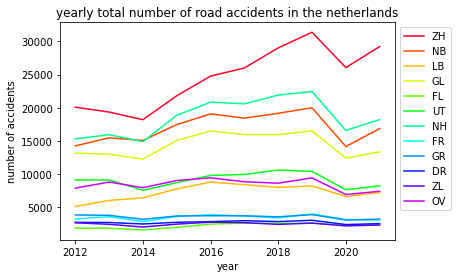

In [390]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)
# color_base = 1/n_provinces

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]
        line.append(point["N_ACCIDENTS"])
    line = np.array(line)
    # color = color_base * i
    plt.plot(year_2, line, label=j, color = colors[i]) #, color=(1-color, color, 0), alpha=0.6)

plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

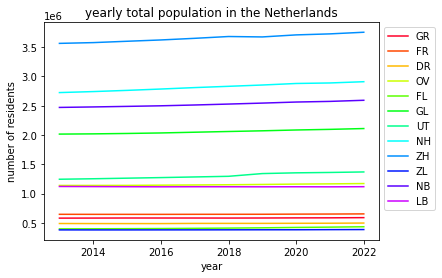

In [391]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min()+1, year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
        line.append(point["TOTAL_POPULATION"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total population in the Netherlands")
plt.xlabel("year")
plt.ylabel("number of residents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

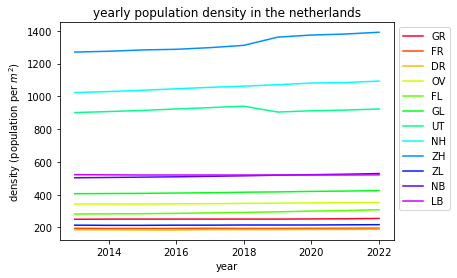

In [392]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min()+1, year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
        line.append(point["POPULATION_DENSITY"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly population density in the netherlands")
plt.xlabel("year")
plt.ylabel("density (population per $m^{2}$)")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

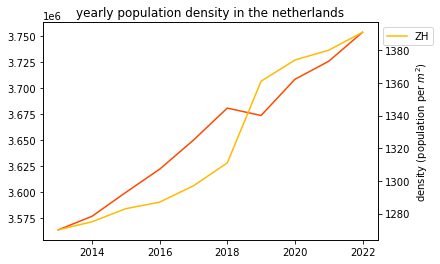

In [393]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min()+1, year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

# for i, j in enumerate(provinces):
j = "ZH"
line_population = []
line_density = []
for k in year_2:
    point_population = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
    line_population.append(point_population["TOTAL_POPULATION"])
    point_density = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
    line_density.append(point_density["POPULATION_DENSITY"])
line_population = np.array(line_population)
line_density = np.array(line_density)

fig, ax = plt.subplots()
ax.plot(year_2, line_population, label=j, color = colors[1])
ax2 = ax.twinx()
ax2.plot(year_2, line_density, label=j, color = colors[2])

plt.title("yearly population density in the netherlands")
plt.xlabel("year")
plt.ylabel("density (population per $m^{2}$)")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

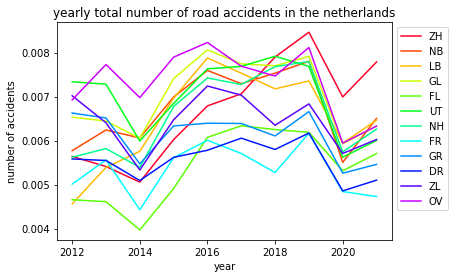

In [394]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        accidents = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]["N_ACCIDENTS"]
        population = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == (k+1))]["TOTAL_POPULATION"]
        accidents_per_population = accidents.values / population.values
        line.append(accidents_per_population)
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# import dataset traffic and vehicles

all values are recorded on the 1st of january each year

all values are recorded on the 1st of january
this means the amount of accidents is used with the amount of vehicles of one year after (e.g. total number of accidents on 31 december 2014 with the total number of vehicles on 1 january 2015)

In [395]:
csv_path_vehicles = "../data/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Voertuigen_2.csv"
df_vehicles = pd.read_csv(csv_path_vehicles, sep=";")
new_column_names = []
for i in enumerate(df_vehicles):
    new_column_name = i[1] + " (" + df_vehicles.iloc[0, i[0]] + ")"
    new_column_names.append(new_column_name)
df_vehicles.columns = new_column_names
df_vehicles = df_vehicles.drop([0]).reset_index().drop("index", axis="columns")
df_vehicles.to_csv("population.csv", index=False)

In [396]:
df_vehicles_2 = pd.read_csv("population.csv")

# compare amount of vehicles to amount of accidents

In [397]:
df_vehicles_2["Regio's (naam)"].unique()

array(['Groningen (PV)', 'Fryslân (PV)', 'Drenthe (PV)',
       'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)',
       'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)',
       'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'], dtype=object)

In [398]:
df_vehicles_2["PROVINCE"] = df_vehicles_2["Regio's (naam)"].map( {"Zuid-Holland (PV)" : "ZH", "Noord-Brabant (PV)" : "NB", "Limburg (PV)" : "LB", "Gelderland (PV)" : "GL", "Flevoland (PV)" : "FL", "Utrecht (PV)" : "UT", "Noord-Holland (PV)" : "NH", "Fryslân (PV)" : "FR", "Groningen (PV)" : "GR", "Drenthe (PV)" : "DR", "Zeeland (PV)" : "ZL", "Overijssel (PV)" : "OV"} )
df_vehicles_2.head(5)

,Perioden (jaar),Regio's (naam),Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal),"Verkeer en vervoer|Motorvoertuigen|Personenauto's, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal),"Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal),Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal),"Verkeer en vervoer|Motorvoertuigen|Motorfietsen, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal),Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (%) (per 1 000 inwoners),PROVINCE
0,2012,Groningen (PV),258414.0,445.0,242080.0,417.0,35524.0,24815.0,43.0,32553.0,56.0,GR
1,2012,Fryslân (PV),303868.0,470.0,289591.0,447.0,50508.0,29510.0,46.0,35940.0,56.0,FR
2,2012,Drenthe (PV),249186.0,508.0,235362.0,480.0,36181.0,25839.0,53.0,24911.0,51.0,DR
3,2012,Overijssel (PV),534868.0,470.0,495495.0,436.0,76663.0,50785.0,45.0,66943.0,59.0,OV
4,2012,Flevoland (PV),316742.0,801.0,156083.0,395.0,47136.0,14690.0,37.0,20650.0,52.0,FL


In [399]:
df_vehicles_2.columns

Index(['Perioden (jaar)', 'Regio's (naam)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's, relatief (per 1 000 inwoners)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren, relatief (per 1 000 inwoners)',
       'Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Motorfietsen, relatief (per 1 000 inwoners)',
       'Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (%) (per 1 000 inwoners)',
       'PROVINCE'],
      dtype='object')

In [400]:
df_vehicles_3 = df_vehicles_2[["Perioden (jaar)", "Regio's (naam)", "Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal)", "Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal)", "Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal)", "Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal)", "Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal)", "PROVINCE"]]
df_vehicles_3 = df_vehicles_3.rename(columns={"Perioden (jaar)": "YEAR", "Regio's (naam)": "PROVINCE_NAME", "Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal)": "PASSENGER_VEHICLES", "Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal)": "PRIVATE_VEHICLES", "Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal)": "COMAPNY_CARS", "Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal)": "MOTORCYLES", "Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal)": "VEHICLES_WITH_MOPED_LICENCE_PLATE"})
df_vehicles_3

,YEAR,PROVINCE_NAME,PASSENGER_VEHICLES,PRIVATE_VEHICLES,COMAPNY_CARS,MOTORCYLES,VEHICLES_WITH_MOPED_LICENCE_PLATE,PROVINCE
0,2012,Groningen (PV),258414.0,242080.0,35524.0,24815.0,32553.0,GR
1,2012,Fryslân (PV),303868.0,289591.0,50508.0,29510.0,35940.0,FR
2,2012,Drenthe (PV),249186.0,235362.0,36181.0,25839.0,24911.0,DR
3,2012,Overijssel (PV),534868.0,495495.0,76663.0,50785.0,66943.0,OV
4,2012,Flevoland (PV),316742.0,156083.0,47136.0,14690.0,20650.0,FL
...,...,...,...,...,...,...,...,...
127,2022,Noord-Holland (PV),NaN,NaN,NaN,NaN,NaN,NH
128,2022,Zuid-Holland (PV),NaN,NaN,NaN,NaN,NaN,ZH
129,2022,Zeeland (PV),NaN,NaN,NaN,NaN,NaN,ZL
130,2022,Noord-Brabant (PV),NaN,NaN,NaN,NaN,NaN,NB


In [401]:
df_vehicles_3["TOTAL_VEHICLES"] = df_vehicles_3["PASSENGER_VEHICLES"] + df_vehicles_3["PRIVATE_VEHICLES"] + df_vehicles_3["COMAPNY_CARS"] + df_vehicles_3["MOTORCYLES"] + df_vehicles_3["VEHICLES_WITH_MOPED_LICENCE_PLATE"]
df_vehicles_3["PVE_CODE"] = df_vehicles_3["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
df_vehicles_3



,YEAR,PROVINCE_NAME,PASSENGER_VEHICLES,PRIVATE_VEHICLES,COMAPNY_CARS,MOTORCYLES,VEHICLES_WITH_MOPED_LICENCE_PLATE,PROVINCE,TOTAL_VEHICLES,PVE_CODE
0,2012,Groningen (PV),258414.0,242080.0,35524.0,24815.0,32553.0,GR,593386.0,9
1,2012,Fryslân (PV),303868.0,289591.0,50508.0,29510.0,35940.0,FR,709417.0,8
2,2012,Drenthe (PV),249186.0,235362.0,36181.0,25839.0,24911.0,DR,571479.0,10
3,2012,Overijssel (PV),534868.0,495495.0,76663.0,50785.0,66943.0,OV,1224754.0,12
4,2012,Flevoland (PV),316742.0,156083.0,47136.0,14690.0,20650.0,FL,555301.0,5
...,...,...,...,...,...,...,...,...,...,...
127,2022,Noord-Holland (PV),NaN,NaN,NaN,NaN,NaN,NH,NaN,7
128,2022,Zuid-Holland (PV),NaN,NaN,NaN,NaN,NaN,ZH,NaN,1
129,2022,Zeeland (PV),NaN,NaN,NaN,NaN,NaN,ZL,NaN,11
130,2022,Noord-Brabant (PV),NaN,NaN,NaN,NaN,NaN,NB,NaN,2


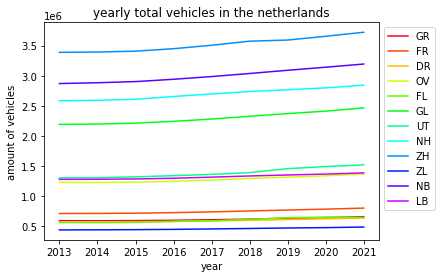

In [402]:
df_vehicles_3.sort_values(by=["YEAR"])
year = df_vehicles_3["YEAR"].unique()
year_2 = range(year.min()+1, year.max()+1)
provinces = df_vehicles_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_vehicles_3[(df_vehicles_3["PROVINCE"] == j) & (df_vehicles_3["YEAR"] == k)]
        line.append(point["TOTAL_VEHICLES"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total vehicles in the netherlands")
plt.xlabel("year")
plt.ylabel("amount of vehicles")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

[0.00593302]  =  [20101]  +  [3387988.]
[0.00570352]  =  [19355]  +  [3393521.]
[0.00534281]  =  [18208]  +  [3407947.]
[0.00632629]  =  [21817]  +  [3448626.]
[0.00706881]  =  [24782]  +  [3505825.]
[0.00727637]  =  [26004]  +  [3573758.]
[0.00808088]  =  [29029]  +  [3592305.]
[0.00858814]  =  [31389]  +  [3654925.]
[0.00700088]  =  [26056]  +  [3721818.]
[nan]  =  [29235]  +  [nan]
[0.0049684]  =  [14260]  +  [2870138.]
[0.00536591]  =  [15476]  +  [2884133.]
[0.00519562]  =  [15082]  +  [2902832.]
[0.00593931]  =  [17470]  +  [2941420.]
[0.00639035]  =  [19083]  +  [2986223.]
[0.00607132]  =  [18441]  +  [3037397.]
[0.00620393]  =  [19174]  +  [3090624.]
[0.00636638]  =  [20000]  +  [3141501.]
[0.00443538]  =  [14168]  +  [3194317.]
[nan]  =  [16867]  +  [nan]
[0.00399731]  =  [5117]  +  [1280112.]
[0.00470887]  =  [6036]  +  [1281836.]
[0.0050007]  =  [6436]  +  [1287020.]
[0.0059864]  =  [7776]  +  [1298944.]
[0.00668348]  =  [8804]  +  [1317278.]
[0.0062959]  =  [8416]  +  [1336

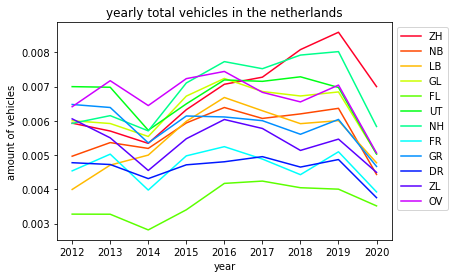

In [403]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        accidents = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]["N_ACCIDENTS"]
        vehicles = df_vehicles_3[(df_vehicles_3["PROVINCE"] == j) & (df_vehicles_3["YEAR"] == (k+1))]["TOTAL_VEHICLES"]
        accidents_per_vehicle = accidents.values / vehicles.values
        print(accidents_per_vehicle, " = ", accidents.values, " + ", vehicles.values)
        line.append(accidents_per_vehicle)
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total vehicles in the netherlands")
plt.xlabel("year")
plt.ylabel("amount of vehicles")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# find correlation with correlation matrix

In [404]:
corr_population = df_7.corr()
mask = np.zeros_like(corr_population, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_population[mask] = np.nan
(corr_population
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_16212\3226969683.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_population


,YEAR,N_ACCIDENTS,PVE_CODE
YEAR,nan,nan,nan
N_ACCIDENTS,0.08,nan,nan
PVE_CODE,0.00,-0.62,nan


In [405]:
df_population_2["PVE_CODE"] = df_population_2["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
corr_population = df_population_2.corr()
mask = np.zeros_like(corr_population, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_population[mask] = np.nan
# corr_population.style.background_gradient(cmap='coolwarm').highlight_null(null_color="#f1f1f1").set_precision(2)
(corr_population
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
# corr_population
# plt.matshow(df_vehicles_2.corr())
# plt.show

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_16212\266307339.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_population


,Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Ongehuwd (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Gehuwd (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Gescheiden (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Verweduwd (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Marokko (aantal),"Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|(voormalige) Nederlandse Antillen, Aruba (aantal)",Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Suriname (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Turkije (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Overig niet-westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorte (aantal),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Sterfte (aantal),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorteoverschot (aantal),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Nieuwvormingen 

In [406]:
corr_vehicles_2 = df_vehicles_3.corr()
mask = np.zeros_like(corr_vehicles_2, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_vehicles_2[mask] = np.nan
# corr_vehicles_2.style.background_gradient(cmap='coolwarm').highlight_null(null_color="#f1f1f1").set_precision(2)
(corr_vehicles_2
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
# corr_vehicles_2
# plt.matshow(df_vehicles_2.corr())
# plt.show

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_16212\4197559045.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_vehicles_2


,YEAR,PASSENGER_VEHICLES,PRIVATE_VEHICLES,COMAPNY_CARS,MOTORCYLES,VEHICLES_WITH_MOPED_LICENCE_PLATE,TOTAL_VEHICLES,PVE_CODE
YEAR,nan,nan,nan,nan,nan,nan,nan,nan
PASSENGER_VEHICLES,0.06,nan,nan,nan,nan,nan,nan,nan
PRIVATE_VEHICLES,0.05,0.99,nan,nan,nan,nan,nan,nan
COMAPNY_CARS,0.06,0.99,0.98,nan,nan,nan,nan,nan
MOTORCYLES,0.03,0.98,0.99,0.98,nan,nan,nan,nan
VEHICLES_WITH_MOPED_LICENCE_PLATE,0.08,0.98,0.98,0.95,0.97,nan,nan,nan
TOTAL_VEHICLES,0.06,1.00,1.00,0.99,0.99,0.98,nan,nan
PVE_CODE,-0.00,-0.72,-0.69,-0.69,-0.62,-0.65,-0.70,nan


In [407]:
df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
0,2014,ZH,18208,1
1,2014,NB,15082,2
2,2014,LB,6436,3
3,2014,GL,12273,4
4,2014,FL,1595,5
...,...,...,...,...
115,2018,FR,3417,8
116,2018,GR,3566,9
117,2018,DR,2854,10
118,2018,ZL,2432,11


In [408]:
df_population_2

,Perioden (jaar),Regio's (naam),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,Bevolking|Particuliere huishoudens|Particuliere huishoudens|Totaal aantal particuliere huishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Eenpersoonshuishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens zonder kinderen (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens met kinderen (aantal),"Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Eenpersoonshuishoudens (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens zonder kinderen (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens met kinderen (%)",Bevolking|Particuliere huishoudens|Gemiddelde huishoudensgrootte (personen per 1 huishouden),PROVINCE,PVE_CODE
0,2012,Groningen (PV),580875,288754,292121,28662,29853,32003,36199,50852,...,283241,122018,80902,80321,"43,1","28,6","28,4","2,02",GR,9
1,2012,Fryslân (PV),647214,323495,323719,35132,39058,41225,39956,37329,...,283615,96461,89880,97274,34,"31,7","34,3","2,25",FR,8
2,2012,Drenthe (PV),490807,243134,247673,24904,28981,31638,28755,22717,...,211236,64800,71817,74619,"30,7",34,"35,3","2,29",DR,10
3,2012,Overijssel (PV),1137668,568764,568904,66073,72081,73456,69692,70965,...,483064,159341,146985,176738,33,"30,4","36,6","2,33",OV,12
4,2012,Flevoland (PV),395525,197783,197742,26596,28077,28666,27082,25239,...,162027,49085,43355,69587,"30,3","26,8","42,9","2,42",FL,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2022,Noord-Holland (PV),2909827,1438477,1471350,144946,146306,153657,162480,183195,...,1400584,600586,365837,434161,"42,9","26,1",31,"2,05",NH,7
128,2022,Zuid-Holland (PV),3753944,1857303,1896641,196231,201322,207646,216602,249456,...,1751086,710917,467602,572567,"40,6","26,7","32,7","2,12",ZH,1
129,2022,Zeeland (PV),386767,192162,194605,17885,19276,20542,21467,20566,...,178648,66022,58456,54170,37,"32,7","30,3","2,13",ZL,11
130,2022,Noord-Brabant (PV),2592874,1301018,1291856,122086,126750,136012,148000,162895,...,1181239,429751,366397,385091,"36,4",31,"32,6","2,16",NB,2


In [417]:
df_pop_n_acc = df_population_2[df_population_2["Perioden (jaar)"] != 2012]
# test = df_7.loc[(df_7["YEAR"] == (df_pop_n_acc["Perioden (jaar)"] - 1)) & (df_7["PROVINCE"] == df_pop_n_acc["PROVINCE"])]
df_7[""]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
target_province = "GR"
df_7_2 = df_5.loc[df_5["PVE_CODE"] == target_province]
df_9 = df_7_2["JAAR_VKL"].value_counts()
df_10 = df_9.reset_index()
df_11 = df_10.sort_values("index", ignore_index=True)
print(df_7_2)
print(df_9)
print(df_10)
print(df_11)